In [ ]:
# Imports
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns


from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [ ]:
#hn2sm el data ly x w y w b3dha t3ml train test split
def split(df):
  x = df.drop("Column3" , axis = 1)

  scaler = StandardScaler()
  scaler.fit(x)
  x = scaler.transform(x)

  y = df['Column3']

  x_tr , x_te , y_tr , y_te = train_test_split(x , y , test_size = 0.2 , shuffle = True , random_state = 0)

  x_tr = np.asarray(x_tr)
  y_tr = np.asarray(y_tr)

  x_te = np.asarray(x_te)
  y_te = np.asarray(y_te)

  return x_tr , x_te , y_tr , y_te

In [ ]:
#bygyb el y lltrain
def train_predict(model , x_tr , y_tr):

  m = model.fit(x_tr , y_tr)
  y_train_predict = m.predict(x_tr)

  return y_train_predict

In [ ]:
#bygyb el y lltest
def test_predict(model , x_tr , x_te , y_tr):

  m = model.fit(x_tr , y_tr)
  y_test_predict = m.predict(x_te)

  return y_test_predict

In [ ]:
#bt7sb el accuracy
def accuracy(y , y_predict):
  r2 = r2_score(y , y_predict)
  return r2

In [ ]:
#function to visulaze the data with the 3 types of svm
def draw(x_tr , y_tr):
  gs = gridspec.GridSpec(2, 2)

  Linear = SVC(C=5, kernel='linear')
  Polynomial = SVC(C=20, kernel='poly')
  RBF = SVC(C=20, kernel='rbf' , gamma = 10)

  plt.rcParams['figure.figsize'] = (20, 10)

  labels = ['C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C = 20 , Gamma = 10 ,RBF Kernel']

  for clf, lab, grd in zip([Linear, Polynomial, RBF], labels , itertools.product([0, 1], repeat=2)):

    clf.fit(x_tr, y_tr)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_tr, y=y_tr, clf=clf, legend=2)
    plt.title(lab)

  plt.show()

In [ ]:
#function to call all the function above and return the results needed
def all(df):
  x_tr , x_te , y_tr , y_te = split(df)

  y_train_predictLinear = train_predict(Linear , x_tr , y_tr)
  y_train_predictPolynomial = train_predict(Polynomial , x_tr , y_tr)
  y_train_predictRBF = train_predict(RBF , x_tr , y_tr)

  y_test_predictLinear = test_predict(Linear , x_tr , x_te , y_tr)
  y_test_predictPolynomial = test_predict(Polynomial , x_tr , x_te , y_tr)
  y_test_predictRBF = test_predict(RBF , x_tr , x_te , y_tr)

  r2_Linear_train = accuracy(y_tr , y_train_predictLinear)
  r2_Polynomial_train = accuracy(y_tr , y_train_predictPolynomial)
  r2_RBF_train = accuracy(y_tr , y_train_predictRBF)

  r2_Linear_test = accuracy(y_te , y_test_predictLinear)
  r2_Polynomial_test = accuracy(y_te , y_test_predictPolynomial)
  r2_RBF_test = accuracy(y_te , y_test_predictRBF)

  return r2_Linear_train , r2_Polynomial_train , r2_RBF_train , r2_Linear_test , r2_Polynomial_test , r2_RBF_test


In [ ]:
Linear = SVC(C=10, kernel='linear')
Polynomial = SVC(C=20, kernel='poly')
RBF = SVC(C=0.5, kernel='rbf' , gamma = 5)

In [ ]:
#read the first dataset
df = pd.read_csv('Aggregation.txt', sep='\t', header=None, names=['Column1', 'Column2', 'Column3'] , skiprows=7)

df

,Column1,Column2,Column3
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


In [ ]:
#calling all the function with the data frame
r2_Linear_train , r2_Polynomial_train , r2_RBF_train , r2_Linear_test , r2_Polynomial_test , r2_RBF_test = all(df)

In [ ]:
#printing the accuracy for each model for train and test
print(f"Accuracy of Linear model in train: {r2_Linear_train}")
print(f"Accuracy of Polynomial model in train: {r2_Polynomial_train}")
print(f"Accuracy of RBF model in train: {r2_RBF_train}")

print("")

print(f"Accuracy of Linear model in test: {r2_Linear_test}")
print(f"Accuracy of Polynomial model in test: {r2_Polynomial_test}")
print(f"Accuracy of RBF model in test: {r2_RBF_test}")

Accuracy of Linear model in train: 1.0
Accuracy of Polynomial model in train: 0.9975442450063878
Accuracy of RBF model in train: 1.0

Accuracy of Linear model in test: 1.0
Accuracy of Polynomial model in test: 1.0
Accuracy of RBF model in test: 1.0


In [ ]:
#calling the split function
x_train , x_test , y_train , y_test = split(df)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


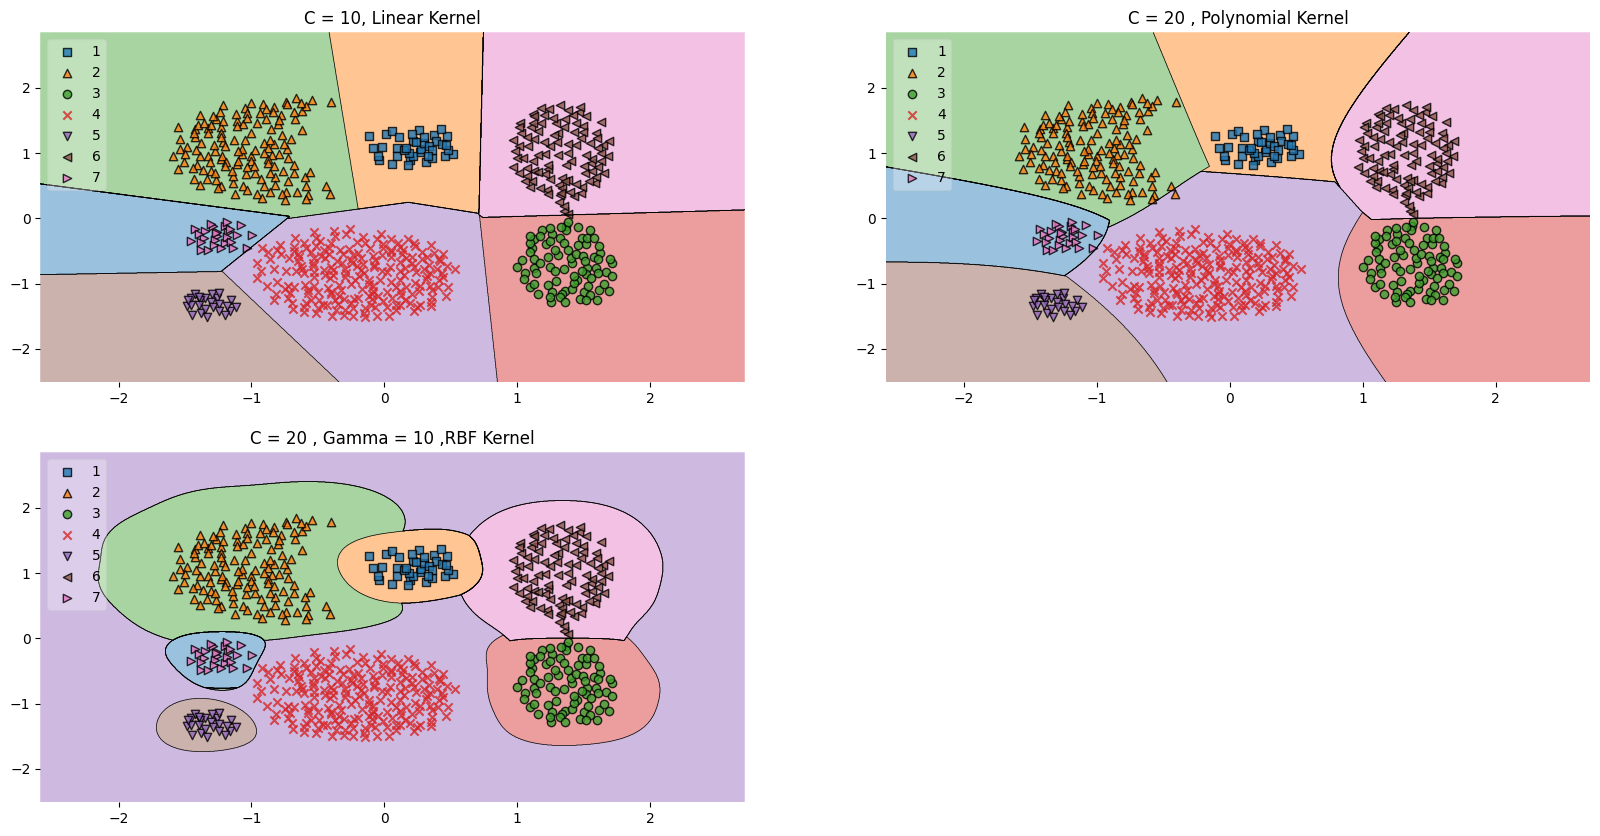

In [ ]:
#calling the function that visualize
draw(x_train , y_train)

In [ ]:
df_2 = pd.read_csv('Compound.txt', sep='\t', header=None, names=['Column1', 'Column2', 'Column3'] , skiprows=7)

df_2

,Column1,Column2,Column3
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1
...,...,...,...
394,15.85,9.95,6
395,15.35,9.90,6
396,15.60,9.45,6
397,15.30,9.15,6


In [ ]:

r2_Linear_train_2 , r2_Polynomial_train_2 , r2_RBF_train_2 , r2_Linear_test_2 , r2_Polynomial_test_2 , r2_RBF_test_2 = all(df_2)

In [ ]:
print(f"Accuracy of Linear model in train: {r2_Linear_train_2}")
print(f"Accuracy of Polynomial model in train: {r2_Polynomial_train_2}")
print(f"Accuracy of RBF model in train: {r2_RBF_train_2}")

print("")

print(f"Accuracy of Linear model in test: {r2_Linear_test_2}")
print(f"Accuracy of Polynomial model in test: {r2_Polynomial_test_2}")
print(f"Accuracy of RBF model in test: {r2_RBF_test_2}")

Accuracy of Linear model in train: 0.9568768090588123
Accuracy of Polynomial model in train: 0.9315102261522313
Accuracy of RBF model in train: 0.9974633417093419

Accuracy of Linear model in test: 0.9453246349798073
Accuracy of Polynomial model in test: 0.880708294501398
Accuracy of RBF model in test: 0.9900590245417832


In [ ]:
x_train_2 , x_test_2 , y_train_2 , y_test_2 = split(df_2)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


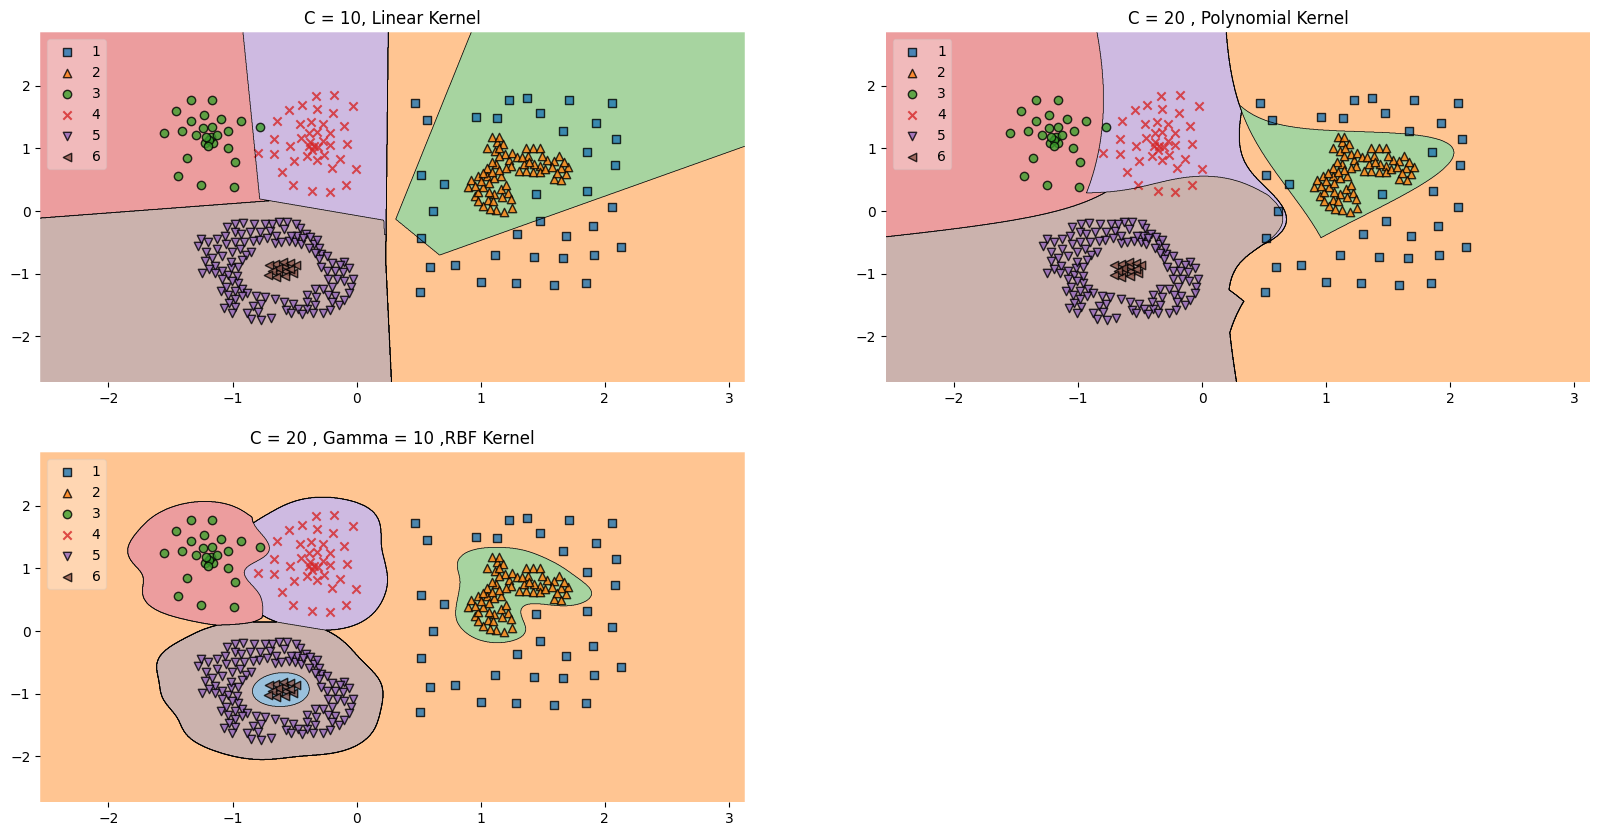

In [ ]:
draw(x_train_2 , y_train_2)

In [ ]:
df_3 = pd.read_csv('Flame.txt', sep='\t', header=None, names=['Column1', 'Column2', 'Column3'] , skiprows=7)

# Print the DataFrame
df_3

,Column1,Column2,Column3
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2
...,...,...,...
235,7.50,26.20,1
236,7.50,25.65,1
237,7.05,25.85,1
238,6.90,27.15,1


In [ ]:
r2_Linear_train_3 , r2_Polynomial_train_3 , r2_RBF_train_3 , r2_Linear_test_3 , r2_Polynomial_test_3 , r2_RBF_test_3 = all(df_3)

In [ ]:
print(f"Accuracy of Linear model in train: {r2_Linear_train_3}")
print(f"Accuracy of Polynomial model in train: {r2_Polynomial_train_3}")
print(f"Accuracy of RBF model in train: {r2_RBF_train_3}")

print("")

print(f"Accuracy of Linear model in test: {r2_Linear_test_3}")
print(f"Accuracy of Polynomial model in test: {r2_Polynomial_test_3}")
print(f"Accuracy of RBF model in test: {r2_RBF_test_3}")

Accuracy of Linear model in train: 0.5555555555555556
Accuracy of Polynomial model in train: 0.6222222222222222
Accuracy of RBF model in train: 0.9777777777777777

Accuracy of Linear model in test: 0.4181818181818182
Accuracy of Polynomial model in test: 0.5151515151515151
Accuracy of RBF model in test: 0.9030303030303031


In [ ]:
x_train_3 , x_test_3 , y_train_3 , y_test_3 = split(df_3)

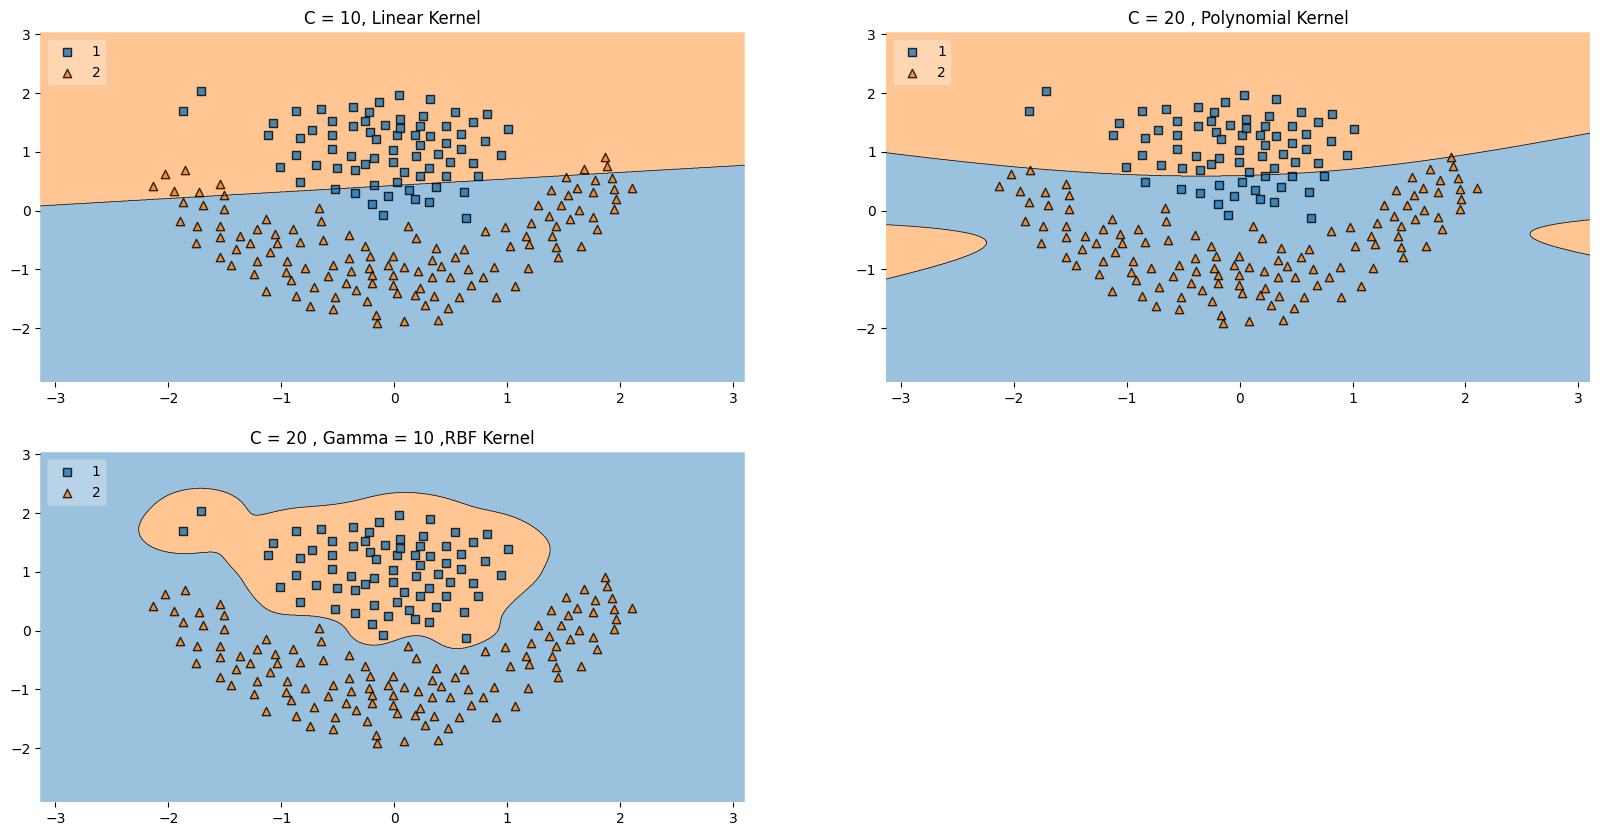

In [ ]:
draw(x_train_3 , y_train_3)

In [ ]:
df_4 = pd.read_csv('Jain.txt', sep='\t', header=None, names=['Column1', 'Column2', 'Column3'] , skiprows=7)

df_4

,Column1,Column2,Column3
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
...,...,...,...
368,38.75,16.85,1
369,39.00,16.60,1
370,38.25,17.35,1
371,39.50,16.95,1


In [ ]:
r2_Linear_train_4 , r2_Polynomial_train_4 , r2_RBF_train_4 , r2_Linear_test_4 , r2_Polynomial_test_4 , r2_RBF_test_4 = all(df_4)

In [ ]:
print(f"Accuracy of Linear model in train: {r2_Linear_train_4}")
print(f"Accuracy of Polynomial model in train: {r2_Polynomial_train_4}")
print(f"Accuracy of RBF model in train: {r2_RBF_train_4}")

print("")

print(f"Accuracy of Linear model in test: {r2_Linear_test_4}")
print(f"Accuracy of Polynomial model in test: {r2_Polynomial_test_4}")
print(f"Accuracy of RBF model in test: {r2_RBF_test_4}")

Accuracy of Linear model in train: 0.741142892597878
Accuracy of Polynomial model in train: 0.8520816529130731
Accuracy of RBF model in train: 1.0

Accuracy of Linear model in test: 0.9411302982731554
Accuracy of Polynomial model in test: 0.9411302982731554
Accuracy of RBF model in test: 1.0


In [ ]:
x_train_4 , x_test_4 , y_train_4 , y_test_4 = split(df_4)

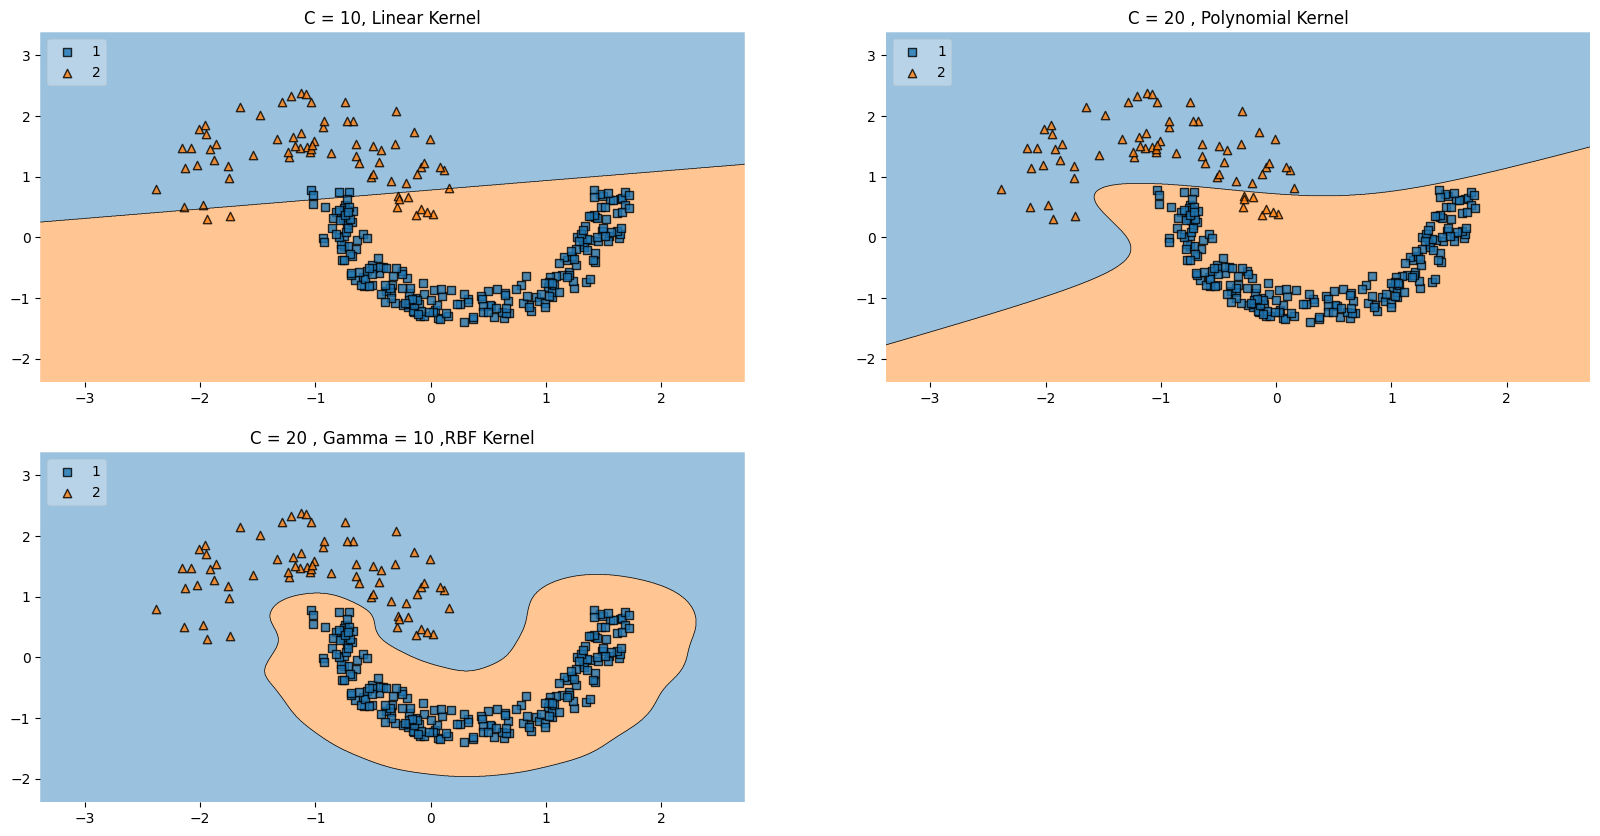

In [ ]:
draw(x_train_4 , y_train_4)

In [ ]:
df_5 = pd.read_csv('Pathbased.txt', sep='\t', header=None, names=['Column1', 'Column2', 'Column3'] , skiprows=7)

df_5

,Column1,Column2,Column3
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1
...,...,...,...
295,17.50,18.05,2
296,16.65,17.50,2
297,15.45,17.30,2
298,15.45,17.80,2


In [ ]:
r2_Linear_train_5 , r2_Polynomial_train_5 , r2_RBF_train_5 , r2_Linear_test_5 , r2_Polynomial_test_5 , r2_RBF_test_5 = all(df_5)

In [ ]:
print(f"Accuracy of Linear model in train: {r2_Linear_train_5}")
print(f"Accuracy of Polynomial model in train: {r2_Polynomial_train_5}")
print(f"Accuracy of RBF model in train: {r2_RBF_train_5}")

print("")

print(f"Accuracy of Linear model in test: {r2_Linear_test_5}")
print(f"Accuracy of Polynomial model in test: {r2_Polynomial_test_5}")
print(f"Accuracy of RBF model in test: {r2_RBF_test_5}")

Accuracy of Linear model in train: -0.13989371261328354
Accuracy of Polynomial model in train: -0.07211624862006127
Accuracy of RBF model in train: 1.0

Accuracy of Linear model in test: -0.2080536912751676
Accuracy of Polynomial model in test: -0.23322147651006686
Accuracy of RBF model in test: 0.7734899328859061


In [ ]:
x_train_5 , x_test_5 , y_train_5 , y_test_5 = split(df_5)

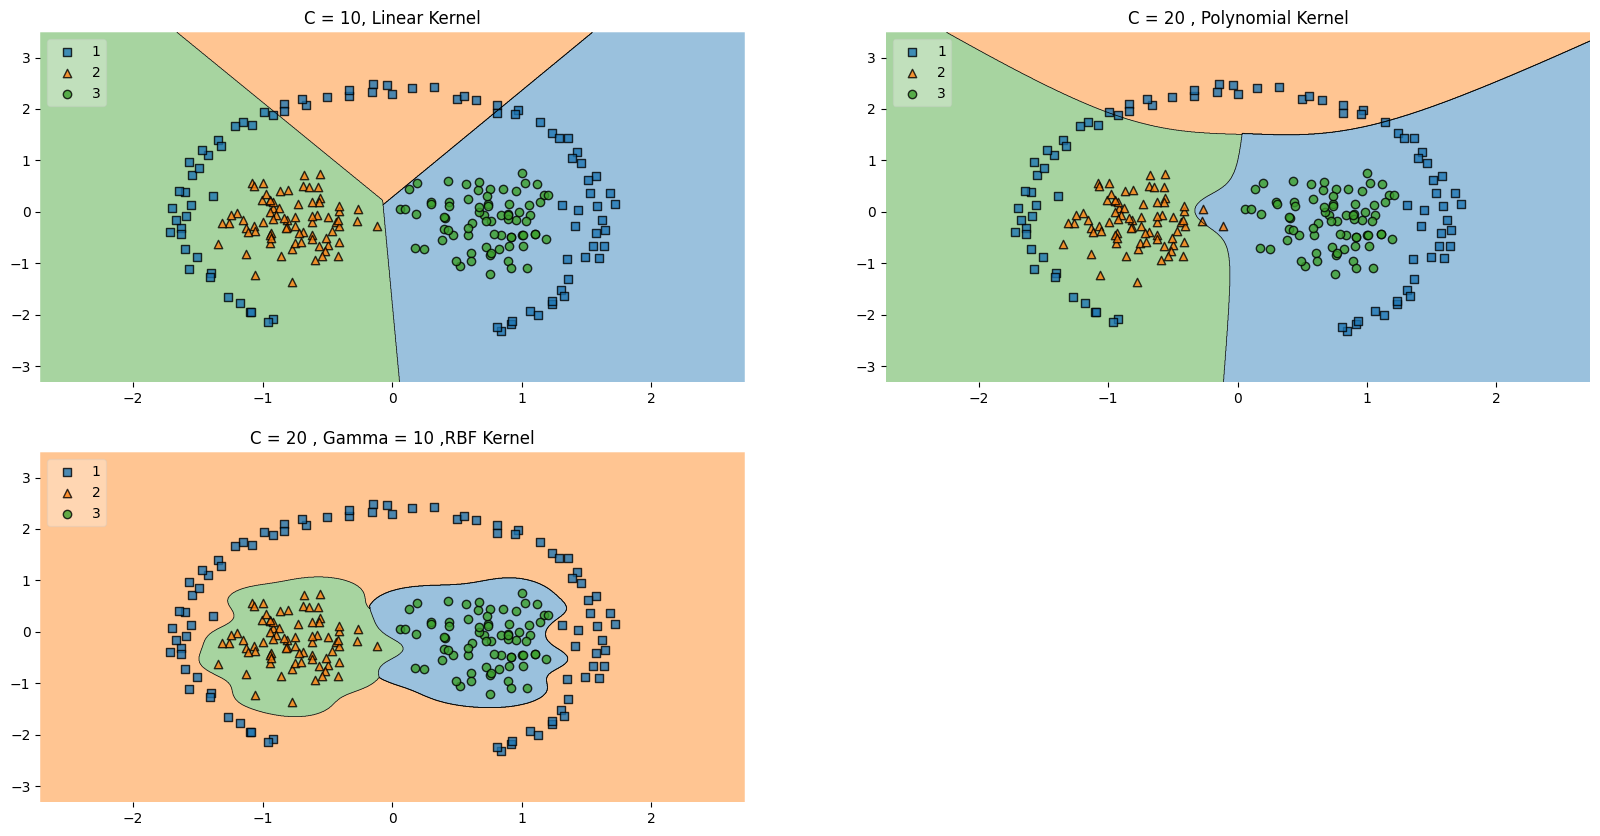

In [ ]:
draw(x_train_5 , y_train_5)

In [ ]:
df_6 = pd.read_csv('Spiral.txt', sep='\t', header=None, names=['Column1', 'Column2', 'Column3'] , skiprows=7)
df_6

,Column1,Column2,Column3
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


In [ ]:
r2_Linear_train_6 , r2_Polynomial_train_6 , r2_RBF_train_6 , r2_Linear_test_6 , r2_Polynomial_test_6 , r2_RBF_test_6 = all(df_6)

In [ ]:
print(f"Accuracy of Linear model in train: {r2_Linear_train_6}")
print(f"Accuracy of Polynomial model in train: {r2_Polynomial_train_6}")
print(f"Accuracy of RBF model in train: {r2_RBF_train_6}")

print("")

print(f"Accuracy of Linear model in test: {r2_Linear_test_6}")
print(f"Accuracy of Polynomial model in test: {r2_Polynomial_test_6}")
print(f"Accuracy of RBF model in test: {r2_RBF_test_6}")

Accuracy of Linear model in train: -1.2156221441970074
Accuracy of Polynomial model in train: -1.000048097734596
Accuracy of RBF model in train: 1.0

Accuracy of Linear model in test: -0.9624600638977638
Accuracy of Polynomial model in test: -0.6605431309904155
Accuracy of RBF model in test: 1.0


In [ ]:
x_train_6 , x_test_6 , y_train_6 , y_test_6 = split(df_6)

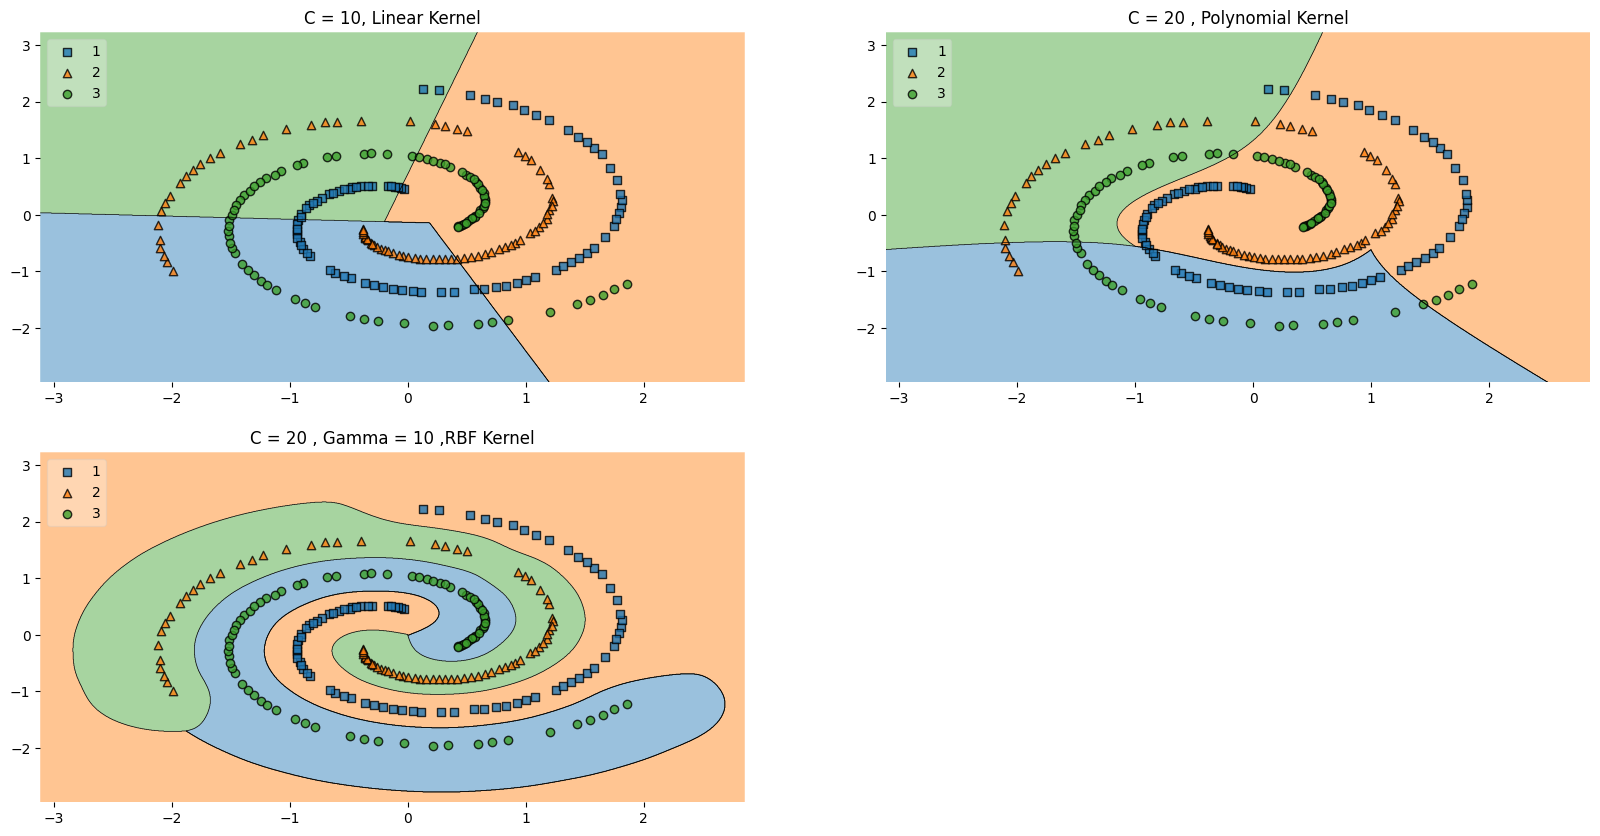

In [ ]:
draw(x_train_6 , y_train_6)